In [1]:
#
# Import Libraries
#

from dotmap import DotMap
import numpy as np
import os
import pandas as pd
import sys

#from sklearn.decomposition import FactorAnalysis
#from factor_analyzer import FactorAnalyzer

from mofapy2.run.entry_point import entry_point
import mofax as mfx

import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import rcParams
rcParams['figure.dpi'] = 200

from plotly import graph_objects as go
from plotly.subplots import make_subplots

utilsPath = r'S:\U_Proteomica\UNIDAD\software\MacrosRafa\data\Metabolomics\PESA_Integromics\Data\utils'
if utilsPath not in sys.path:
    sys.path.append(utilsPath)

In [2]:
#
# Set constants
#

Qworking_path = r"S:\U_Proteomica\UNIDAD\software\MacrosRafa\data\Metabolomics\PESA_Integromics\Data\Proteomics\AWHS"
Mworking_path = r"S:\U_Proteomica\UNIDAD\software\MacrosRafa\data\Metabolomics\PESA_Integromics\Data\Metabolomics\AWHS"

# X
xq_path = os.path.join(Qworking_path, "WorkingFiles", "Xq_minus_X_norm.tsv")
mq_path = os.path.join(Mworking_path, "WorkingFiles", "Xm_norm_MS2.tsv")

# Feature info
q2i_path = os.path.join(Qworking_path, "WorkingFiles", "q2info.tsv")
m2i_path = os.path.join(Mworking_path, "WorkingFiles", "m2info.tsv")

# metadata
mdata_path = os.path.join(r"S:\U_Proteomica\UNIDAD\software\MacrosRafa\data\Metabolomics\PESA_Integromics\Data\Metadata\AWHS\WorkingFiles\main_metadata.tsv")

# RPath
rPath = r"S:\U_Proteomica\UNIDAD\software\MacrosRafa\data\Metabolomics\PESA_Integromics\Data\Analysis\02-Correlations\AWHS\myRData"

qualCols = ['diabetes', 'smoker', 'HIPERTENSION_RF', 'DISLIPEMIA_RF']
quanCols = ['Plaque thickness', 'Calcio Score', 'coltot', 'hdl', 'FHS10y', 'presis', 'presdi', 'Caso/control', 'Glucosa', 'age']

In [3]:
#
# Read data
#

xq = pd.read_csv(xq_path, sep='\t', index_col=0)
xm = pd.read_csv(mq_path, sep='\t', index_col=0)

q2i = pd.read_csv(q2i_path, sep='\t')
m2i = pd.read_csv(m2i_path, sep='\t')

mdata = pd.read_csv(mdata_path, sep='\t', index_col=0)

In [4]:
tmp = m2i.set_index('fid').loc[xm.columns]['NAME']
xm.columns = [f"{i} | {j}" for i,j in zip(tmp.index, tmp.values)]

In [5]:
# Intersect q-omics and m-omics

seqn = np.intersect1d(
    xq.index,
    xm.index
)

xqi = xq.loc[seqn].copy()
xmi = xm.loc[seqn].copy()
mdatai = mdata.loc[seqn]

In [6]:
# Create data matrix object (without separating by groups)

# data_mat = [
#     [
#     xqi.loc[mdatai[mdatai['Group']=='C'].index].to_numpy(),
#     xqi.loc[mdatai[mdatai['Group']=='D'].index].to_numpy()
#     ],
#     [
#     xmi.loc[mdatai[mdatai['Group']=='C'].index].to_numpy(),
#     xmi.loc[mdatai[mdatai['Group']=='D'].index].to_numpy()
#     ]
# ]

data_mat = [
    [
    xqi.to_numpy(),
    ],
    [
    xmi.to_numpy(),
    ]
]

ent = entry_point()
ent.set_data_options(scale_groups=False, scale_views=False, center_groups=False)

ent.set_data_matrix(
    data_mat, 
    views_names=['q', 'm'], 
    #groups_names=['C', 'D'],
    features_names=[xqi.columns, xmi.columns],
    # samples_names=[
    #     [str(i) for i in mdatai[mdatai['Group']=='C'].index], 
    #     [str(i) for i in mdatai[mdatai['Group']=='D'].index]
    # ],
    samples_names=[[str(i) for i in seqn]],
    likelihoods=['gaussian', 'gaussian']
)

ent.set_model_options(
    factors = 25, 
    spikeslab_weights = True, 
    spikeslab_factors=False,
    ard_weights = True,
    ard_factors=True
)

ent.set_train_options(
    convergence_mode = "slow", 
    iter=10000,
    dropR2 = 0.015, 
    gpu_mode = False, 
    seed = 1,
)


        #########################################################
        ###           __  __  ____  ______                    ### 
        ###          |  \/  |/ __ \|  ____/\    _             ### 
        ###          | \  / | |  | | |__ /  \ _| |_           ### 
        ###          | |\/| | |  | |  __/ /\ \_   _|          ###
        ###          | |  | | |__| | | / ____ \|_|            ###
        ###          |_|  |_|\____/|_|/_/    \_\              ###
        ###                                                   ### 
        ######################################################### 
       
 
        
Groups names not provided, using default naming convention:
- group1, group2, ..., groupG

Successfully loaded view='q' group='group0' with N=312 samples and D=381 features...
Successfully loaded view='m' group='group0' with N=312 samples and D=656 features...


Model options:
- Automatic Relevance Determination prior on the factors: True
- Automatic Relevance Determination prio

In [159]:
m.close()
del m

In [7]:
ent.build()

ent.run()

# Save the output
ent.save(outfile=r'./modelpy.hdf5')



######################################
## Training the model with seed 1 ##
######################################


ELBO before training: -5117017.12 

Iteration 1: time=0.27, ELBO=-434604.08, deltaELBO=4682413.040 (91.50669094%), Factors=24
Iteration 2: time=0.28, ELBO=-378156.77, deltaELBO=56447.309 (1.10312918%), Factors=23
Iteration 3: time=0.35, ELBO=-364092.35, deltaELBO=14064.421 (0.27485586%), Factors=22
Iteration 4: time=0.29, ELBO=-341498.02, deltaELBO=22594.327 (0.44155270%), Factors=21
Iteration 5: time=0.26, ELBO=-327993.36, deltaELBO=13504.658 (0.26391661%), Factors=20
Iteration 6: time=0.22, ELBO=-323818.22, deltaELBO=4175.144 (0.08159331%), Factors=19
Iteration 7: time=0.20, ELBO=-317567.96, deltaELBO=6250.263 (0.12214661%), Factors=18
Iteration 8: time=0.19, ELBO=-312751.26, deltaELBO=4816.695 (0.09413092%), Factors=17
Iteration 9: time=0.18, ELBO=-309950.34, deltaELBO=2800.924 (0.05473743%), Factors=16
Iteration 10: time=0.17, ELBO=-386727.73, deltaELBO=-76777.396 

In [6]:
m = mfx.mofa_model('modelpy.hdf5')

In [7]:
print(f"""\
Observations: {m.shape[0]}
Features: {m.shape[1]}
Groups of observations: {', '.join(m.groups)}
Views: {', '.join(m.views)}
""")

Observations: 312
Features: 1037
Groups of observations: group0
Views: q, m



In [8]:
# Get weights from the model

wq = m.get_weights(df=True).loc[xqi.columns]
wm = m.get_weights(df=True).loc[xmi.columns]

In [11]:
palette = ['#636EFA', '#EF553B']

In [9]:
# Variance explained by factors

explVar = pd.pivot_table(m.get_variance_explained(), values='R2', index='Factor', columns='View')
explVar

View,m,q
Factor,,
Factor1,31.682004,1.081997
Factor2,7.062885,0.630928
Factor3,6.645778,0.173249
Factor4,5.004846,0.526826
Factor5,2.209049,0.059762
Factor6,2.241553,0.006387
Factor7,1.882586,0.196756
Factor8,1.960098,0.056130


In [26]:
mdatai[nfactor]

,Group,Caso/control,Codigo_Proteo,Codigo_externo,N_TERRITORIES,PESA Score,PESA Score_Num,Glucosa,LPA,Calcio Score,...,MED_HIPERTENSION,MED_OTRAS,DIABETES_RF,HIPERTENSION_RF,DISLIPEMIA_RF,Plaque thickness,Cohort,Metabo_Batch,Metabo_GlobalOrder,FHS10y
Seqn,,,,,,,,,,,,,,,,,,,,,
2515,C,0,C1,53366,0,No Disease,0,104,8,0.00,...,*,*,False,0.0,0.0,0.00,1,1.0,10.0,0.150827
2816,C,0,C144,40532,0,No Disease,0,125,53,0.00,...,*,*,False,0.0,1.0,0.00,3,7.0,299.0,0.131678
6646,C,0,C34,56632,0,No Disease,0,103,26,0.00,...,*,*,False,0.0,0.0,0.00,1,2.0,81.0,0.064581
10845,D,1,42,54764,5,Generalized Disease,3,113,None,0.00,...,*,*,False,0.0,1.0,6.54,1,2.0,62.0,0.195050
11009,C,0,C114,42063,0,No Disease,0,93,NaN,0.00,...,*,SI,False,0.0,0.0,0.00,2,6.0,258.0,0.080138
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
990683,D,1,109,62843,4,Generalized Disease,3,90,NaN,NaN,...,*,*,False,0.0,NaN,9.63,3,5.0,208.0,0.092277
991682,D,1,127,54034,3,Intermediate Disease,2,79,35,11.82,...,SI,SI,False,1.0,0.0,6.14,2,6.0,248.0,0.125770
996018,D,1,67,60147,4,Generalized Disease,3,85,7,380.35,...,*,*,False,0.0,0.0,7.98,2,4.0,139.0,0.100365


In [10]:
#
# Correlation Analysis between Projections and metadata
#

import statsmodels.api as sm
from statsmodels.formula.api import ols


pv = {}
model = {}

for n, nfactor in enumerate(m.get_factors().T):

    pv[n] = {}
    model[n] = {}

    for mdatacol in quanCols:

        # model[n][mdatacol] = sm.OLS(
        #     mdatai[mdatacol],
        #     sm.add_constant(nfactor)
        # ).fit()
        model[n][mdatacol] = sm.OLS(
            mdatai[mdatacol].fillna(0),
            sm.add_constant(nfactor)
            # nfactor,
            # sm.add_constant(mdatai[mdatacol].fillna(0))
        ).fit()

        pv[n][mdatacol] = model[n][mdatacol].pvalues[-1]
    
    for mdatacol in qualCols:
        model[n][mdatacol] = ols(
            'y ~ C(x)', 
            pd.DataFrame({
                'y': nfactor,
                'x': mdatai.loc[:, mdatacol]
            })
        ).fit()

        pv[n][mdatacol] = sm.stats.anova_lm(model[n][mdatacol])['PR(>F)']['C(x)']

pv = pd.DataFrame(pv)
pv.columns = explVar.index
pd.concat([
    explVar.T.round(3),
    pv
])

from statsmodels.stats.multitest import multipletests

pvfdr = pv.copy()
for i in pv.columns:
    pvfdr[i] = multipletests(pvfdr[i], method='fdr_bh')[1]

pd.concat([
    explVar.T,#.round(3),
    pvfdr
])#.round(4)

Factor,Factor1,Factor2,Factor3,Factor4,Factor5,Factor6,Factor7,Factor8
m,3.168200e+01,7.062885e+00,6.645778,5.004846,2.209049,2.241553,1.882586,1.960098
q,1.081997e+00,6.309277e-01,0.173249,0.526826,0.059762,0.006387,0.196756,0.056130
Plaque thickness,3.606919e-01,7.819044e-01,0.782437,0.301868,0.939120,0.883810,0.906366,0.973267
Calcio Score,9.243765e-01,7.347157e-01,0.874262,0.378227,0.939120,0.883810,0.906366,0.973267
coltot,6.931761e-06,8.342143e-07,0.920322,0.003763,0.939120,0.883810,0.906366,0.973267
hdl,1.643255e-17,6.596527e-12,0.009308,0.926984,0.939120,0.471570,0.906366,0.679354
FHS10y,5.448556e-14,7.347157e-01,0.782437,0.072986,0.842834,0.883810,0.906366,0.973267
presis,1.271187e-03,7.347157e-01,0.230463,0.926984,0.842834,0.960628,0.906366,0.973267
presdi,1.026013e-03,7.347157e-01,0.230463,0.926984,0.766286,0.883810,0.906366,0.973267
Caso/control,4.398208e-01,7.347157e-01,0.782437,0.412791,0.939120,0.883810,0.906366,0.973267


In [11]:
coefs = pd.DataFrame({i: {j: model[i][j].params[1] for j in model[i]} for i in model})#, columns=explVar.index)
coefs.columns = explVar.index
coefs

Factor,Factor1,Factor2,Factor3,Factor4,Factor5,Factor6,Factor7,Factor8
Plaque thickness,9.695316,-5.691109,6.763204,-31.273009,-2.828228,4.598189,-3.621744,-8.186564
Calcio Score,-0.345507,-4.294576,1.094252,-11.438846,-0.709760,1.282809,9.961142,2.352036
coltot,-2.905147,7.633558,-0.077669,5.639100,-0.088559,0.439778,-0.371742,0.763028
hdl,1.475296,2.960246,-0.757649,-0.154507,-0.135874,0.367445,-0.581753,0.415897
FHS10y,-0.007291,-0.001818,0.000698,0.005372,0.001132,-0.000918,0.001733,-0.000907
presis,-1.671302,0.911360,-1.276841,0.168647,0.712322,0.026900,0.337923,0.106012
presdi,-1.141247,0.429873,-0.787917,0.092277,0.586506,0.149228,0.235131,0.028409
Caso/control,-0.008082,-0.009911,0.004604,0.022831,-0.002693,0.002200,-0.002120,0.003907
Glucosa,-0.606077,-0.234256,-0.351618,0.834139,-0.583547,-0.094800,0.172451,-0.012409
age,-0.045212,0.095111,-0.071582,0.417862,-0.179457,0.071099,0.085994,0.084573


FACTOR EXPLORATION

In [31]:
top = 15
col = 'Factor1'

fig = make_subplots(rows=1, cols=2, subplot_titles=[f'q | {round(explVar.loc[col]["q"],4)}%', f'm | {round(explVar.loc[col]["m"],4)}%'])
fig.add_trace(go.Scatter(
    y=np.arange(wq.shape[0])/wq.shape[0],
    x=sorted(wq[col].to_numpy()),
    mode='markers',
    marker_size=3,
    marker_color=top*['black'] + (wq.shape[0]-2*top)*[palette[0]] + top*['black'],
    showlegend=False
), row=1, col=1)

fig.add_trace(go.Scatter(
    y=np.arange(wm.shape[0])/wm.shape[0],
    x=sorted(wm[col].to_numpy()),
    mode='markers',
    marker_size=3,
    marker_color=top*['black'] + (wm.shape[0]-2*top)*[palette[1]] + top*['black'],
    showlegend=False
), row=1, col=2)

fig.update_xaxes(range=(-1,1), title='Weight')
fig.show()

w_all = {}
for df, omic, xi in [(wq, 'q', xqi), (wm, 'm', xmi)]:
    fig = make_subplots(rows=1, cols=2, subplot_titles=['Negative', 'Positive'], horizontal_spacing=0.15)

    tmp = df.sort_values(col, ascending=False)[col]
    w_all[omic] = tmp
    topup = tmp[:top]
    topdo = tmp[-top:]

    fig.add_trace(go.Bar(
        y=topup.index[::-1],
        x=topup.values[::-1],
        orientation='h',
        width=0.1, showlegend=False
    ), row=1, col=2)

    fig.add_trace(go.Bar(
        y=topdo.index,
        x=topdo.values,
        orientation='h',
        width=0.1, showlegend=False
    ), row=1, col=1)
    fig.update_xaxes(range=(-1,1), title='Weight')
    fig.update_layout(height=400+15*top, title=omic)
    fig.show()

    #sns.clustermap(xi.loc[:, topup.index.tolist()+topdo.index.tolist()].T, cmap='vlag', figsize=(12,6), center=0, vmin=-3, vmax=3)

In [132]:
list(zip(wm.Factor1.sort_values().index, wm.Factor1.sort_values()))

[('P120 | TAG [50:3]', -0.28675516164971493),
 ('P118 | TAG [50:3]', -0.2855037682994606),
 ('P116 | TAG [50:3]', -0.28537830341839243),
 ('P115 | TAG [50:3]', -0.28527579066478936),
 ('P119 | TAG [50:3]', -0.2839782341636397),
 ('P121 | TAG [50:3]', -0.28383760296530564),
 ('P117 | TAG [50:3]', -0.283235901065129),
 ('P305 | TAG [51:3]', -0.28249047516251746),
 ('P291 | TAG [51:3]', -0.28172391323929075),
 ('P371 | TAG [51:3]', -0.28107878181774865),
 ('P113 | TAG [50:3]', -0.27998902332826886),
 ('P323 | TAG [51:3]', -0.2799392910254421),
 ('P114 | TAG [50:3]', -0.2787091039891747),
 ('P309 | TAG [51:3]', -0.2779888197429126),
 ('P145 | TAG [52:3]', -0.27560308442598475),
 ('P144 | TAG [52:3]', -0.2752579300294012),
 ('P110 | TAG [50:3]', -0.2747697097711233),
 ('P287 | TAG [51:3]', -0.2747673959083636),
 ('P292 | TAG [53:3]', -0.2746382967080293),
 ('P143 | TAG [52:3]', -0.27433861539807314),
 ('P112 | TAG [50:3]', -0.27376481499808103),
 ('P142 | TAG [52:3]', -0.27375282527088884),

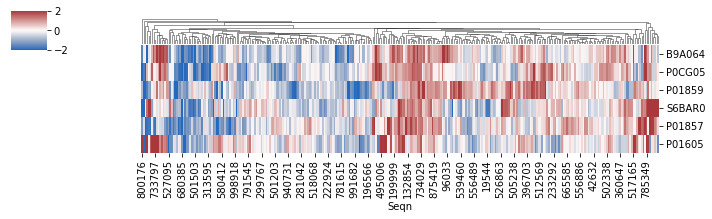

In [14]:
# HEATMAP

prots = ['P27169','P80108','P02647','P02652']
tmp = xqi.loc[
    :, 
    # ['Q13790','P02656'] #table.index
    #w_all['q'][:15].index.tolist()+w_all['q'][-15:].index.tolist()
    ['B9A064','P0CG05', 'P01859', 'S6BAR0', 'P01857', 'P01605']
    ].join(

xmi.loc[
    :, 
    #w_all['m'][:0].index.tolist()+w_all['m'][:0].index.tolist()
    []
    ]
).T

sns.clustermap(
    tmp,
    cmap='vlag', figsize=(10,3), center=0, row_cluster=False, col_cluster=True, vmin=-2, vmax=2)

In [153]:
table = q2i.set_index('fid').join(wq.loc[:, ['Factor1']]).dropna()

In [154]:
table = table.iloc[np.abs(table.Factor1.to_numpy()).argsort()[:]].sort_values('Factor1', ascending=False)

In [155]:
table.to_csv('Table/q_factor1.tsv', sep='\t')

STRING FUNCTIONS

In [89]:
from STRING import Uniprot2String, FunctionalEnrichment

In [90]:
background = Uniprot2String(
    q2i['fid'].tolist()
)

background = [i[1] for i in background]

In [91]:
my_genes = Uniprot2String(
    #w_all['q'].index.tolist()[:15]+w_all['q'].index.tolist()[-15:]
    table.index
)
my_genes = [i[1] for i in my_genes]

In [92]:
data = FunctionalEnrichment(my_genes, background, species=9606)

from io import StringIO

data = pd.read_csv(
    StringIO(data),
    sep='\t'
)

In [97]:
col = ['category', 'number_of_genes', 'number_of_genes_in_background', 'fdr', 'description']
categories = ['Process', 'KEGG', 'Component']
data[np.isin(data['category'], categories)].sort_values('fdr').loc[:, col]#.head(15)

,category,number_of_genes,number_of_genes_in_background,fdr,description
12,Component,15,886,0.00027,Extracellular region
13,Component,14,769,0.00027,Extracellular space
14,Component,13,574,0.00027,Extracellular exosome
15,Component,3,5,0.00190,Intermediate-density lipoprotein particle
16,Component,4,24,0.00250,High-density lipoprotein particle
50,KEGG,4,22,0.00250,Cholesterol metabolism
17,Component,3,7,0.00310,Low-density lipoprotein particle
18,Component,3,9,0.00380,Chylomicron
19,Component,6,122,0.00400,Vesicle lumen
20,Component,3,13,0.00760,Very-low-density lipoprotein particle


In [94]:
def PlotNetwork(identifiers, species=9606):

    ################################################################
    ## For each protein in a list save the PNG image of
    ## STRING network of its 15 most confident interaction partners.
    ##
    ## Requires requests module:
    ## type "python -m pip install requests" in command line (win)
    ## or terminal (mac/linux) to install the module
    ################################################################

    import requests ## python -m pip install requests
    from time import sleep
    

    string_api_url = "https://version-11-5.string-db.org/api"
    output_format = "image"
    method = "network"

    my_genes = ["YMR055C", "YFR028C",
                "YNL161W", "YOR373W",
                "YFL009W", "YBR202W"]


    ##
    ## Construct URL
    ##


    request_url = "/".join([string_api_url, output_format, method])

    ## For each gene call STRING

    #for gene in my_genes:

    ##
    ## Set parameters
    ##

    params = {

        "identifiers" : "\r".join(identifiers), # your protein
        "species" : species, # species NCBI identifier 
        "add_white_nodes": 0, # add 15 white nodes to my protein 
        "network_flavor": "confidence", # show confidence links
        "caller_identity" : "www.awesome_app.org" # your app name

    }


    ##
    ## Call STRING
    ##

    response = requests.post(request_url, data=params)
    return response.content

    ##
    ## Save the network to file
    ##

    #file_name = "%s_network.png" % gene
    #print("Saving interaction network to %s" % file_name)

    #with open(file_name, 'wb') as fh:
    #    fh.write(response.content)

    #sleep(1)

In [96]:
import requests

res = requests.get(
f'https://string-db.org/api/tsv/get_link?identifiers={"%0d".join(my_genes)}&species=9606'
)

print(res.content.decode('ascii'))

url
https://string-db.org/cgi/link?to=5C577CECB2507167



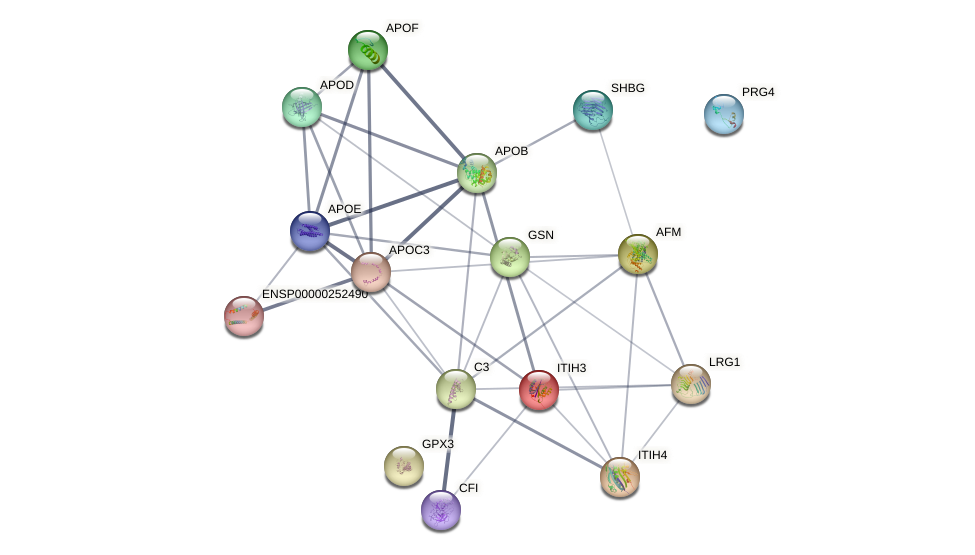

In [95]:
from IPython.display import Image

Image(PlotNetwork(my_genes))